#Скачивание данных

In [ ]:
!pip install -q kaggle
!rm -r ~/.kaggle
!mkdir ~/.kaggle
!mv ./kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!kaggle competitions download -c nyc-taxi-trip-duration

rm: cannot remove '/root/.kaggle': No such file or directory
 92% 79.0M/85.8M [00:01<00:00, 58.6MB/s]
100% 85.8M/85.8M [00:01<00:00, 51.5MB/s]


In [ ]:
!unzip nyc-taxi-trip-duration.zip -d nyc-taxi-trip-duration
!unzip nyc-taxi-trip-duration/test.zip -d nyc-taxi-trip-duration
!unzip nyc-taxi-trip-duration/train.zip -d nyc-taxi-trip-duration

!rm nyc-taxi-trip-duration.zip
!rm nyc-taxi-trip-duration/train.zip
!rm nyc-taxi-trip-duration/test.zip

Archive:  nyc-taxi-trip-duration.zip
  inflating: nyc-taxi-trip-duration/sample_submission.zip  
  inflating: nyc-taxi-trip-duration/test.zip  
  inflating: nyc-taxi-trip-duration/train.zip  
Archive:  nyc-taxi-trip-duration/test.zip
  inflating: nyc-taxi-trip-duration/test.csv  
Archive:  nyc-taxi-trip-duration/train.zip
  inflating: nyc-taxi-trip-duration/train.csv  


In [ ]:
!pip install pandarallel

#Чтение данных

In [ ]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from tqdm import tqdm_notebook
from datetime import datetime, timedelta

import warnings

warnings.filterwarnings('ignore')

In [ ]:
df = pd.read_csv('nyc-taxi-trip-duration/train.csv')
test = pd.read_csv('nyc-taxi-trip-duration/test.csv')

In [ ]:
df.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435


In [ ]:
df.shape

(1458644, 11)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1458644 entries, 0 to 1458643
Data columns (total 11 columns):
 #   Column              Non-Null Count    Dtype  
---  ------              --------------    -----  
 0   id                  1458644 non-null  object 
 1   vendor_id           1458644 non-null  int64  
 2   pickup_datetime     1458644 non-null  object 
 3   dropoff_datetime    1458644 non-null  object 
 4   passenger_count     1458644 non-null  int64  
 5   pickup_longitude    1458644 non-null  float64
 6   pickup_latitude     1458644 non-null  float64
 7   dropoff_longitude   1458644 non-null  float64
 8   dropoff_latitude    1458644 non-null  float64
 9   store_and_fwd_flag  1458644 non-null  object 
 10  trip_duration       1458644 non-null  int64  
dtypes: float64(4), int64(3), object(4)
memory usage: 122.4+ MB


#Анализ данных

(40.5, 41.0)

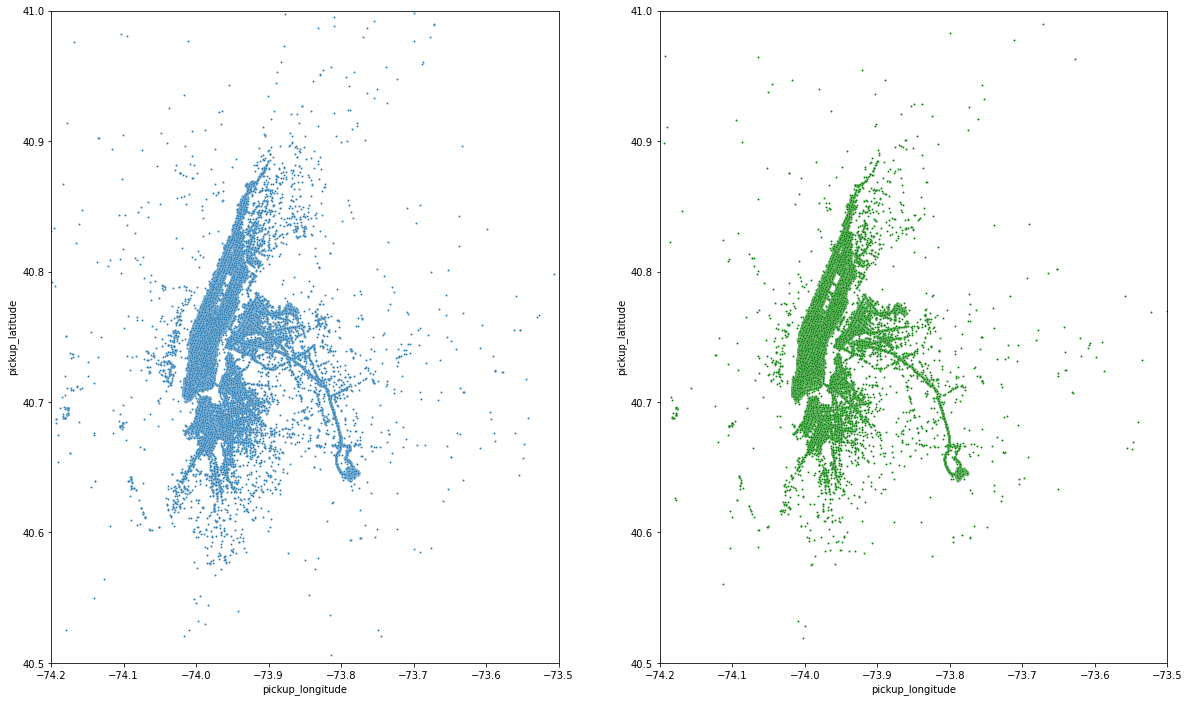

In [ ]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(20, 12))

sns.scatterplot(df['pickup_longitude'], df['pickup_latitude'], s=4, ax=ax[0])
ax[0].set_xlim([-74.2, -73.5])
ax[0].set_ylim([40.5, 41])

sns.scatterplot(test['pickup_longitude'], test['pickup_latitude'], s=4, ax=ax[1], color='green')
ax[1].set_xlim([-74.2, -73.5])
ax[1].set_ylim([40.5, 41])

In [ ]:
df.describe()

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration
count,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06
mean,1.534950e+00,1.664530e+00,-7.397349e+01,4.075092e+01,-7.397342e+01,4.075180e+01,9.594923e+02
std,4.987772e-01,1.314242e+00,7.090186e-02,3.288119e-02,7.064327e-02,3.589056e-02,5.237432e+03
min,1.000000e+00,0.000000e+00,-1.219333e+02,3.435970e+01,-1.219333e+02,3.218114e+01,1.000000e+00
25%,1.000000e+00,1.000000e+00,-7.399187e+01,4.073735e+01,-7.399133e+01,4.073588e+01,3.970000e+02
50%,2.000000e+00,1.000000e+00,-7.398174e+01,4.075410e+01,-7.397975e+01,4.075452e+01,6.620000e+02
75%,2.000000e+00,2.000000e+00,-7.396733e+01,4.076836e+01,-7.396301e+01,4.076981e+01,1.075000e+03
max,2.000000e+00,9.000000e+00,-6.133553e+01,5.188108e+01,-6.133553e+01,4.392103e+01,3.526282e+06


In [ ]:
test.describe()

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude
count,625134.000000,625134.000000,625134.000000,625134.000000,625134.000000,625134.000000
mean,1.534884,1.661765,-73.973614,40.750927,-73.973458,40.751816
std,0.498782,1.311293,0.073389,0.029848,0.072565,0.035824
min,1.000000,0.000000,-121.933128,37.389587,-121.933327,36.601322
25%,1.000000,1.000000,-73.991852,40.737392,-73.991318,40.736000
50%,2.000000,1.000000,-73.981743,40.754093,-73.979774,40.754543
75%,2.000000,2.000000,-73.967400,40.768394,-73.963013,40.769852
max,2.000000,9.000000,-69.248917,42.814938,-67.496796,48.857597


MIN и MAX значения для trip_duration и passenger_count являются вероятно ошибками. Так же, так как мы рассматриваем только New York, нужно определить пределы по координатам (широта и долгота

In [ ]:
df = df[df.pickup_longitude.between(-75, -71) & df.dropoff_longitude.between(-75, -71)]

In [ ]:
test[(test.pickup_longitude < -75) | (test.pickup_longitude > -71)]

,id,vendor_id,pickup_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag
152325,id0159022,2,2016-05-16 13:37:00,1,-77.039436,38.898849,-77.039436,38.898849,N
157734,id2494438,1,2016-05-14 22:40:31,2,-69.248917,37.527687,-73.958351,40.778332,N
203685,id1455078,2,2016-05-02 09:57:00,1,-77.039436,38.898849,-77.039436,38.898849,N
262912,id1357179,2,2016-04-15 11:47:00,1,-77.039436,38.898849,-77.039436,38.898849,N
308069,id3858705,1,2016-04-02 22:42:19,1,-76.963242,38.946033,-76.963242,38.946033,N
324125,id0505885,2,2016-03-29 14:28:46,2,-121.933128,37.389587,-121.933327,37.389374,N
336944,id1304703,2,2016-03-25 17:21:00,3,-76.991531,38.864689,-76.991531,38.864689,N
344754,id3395374,2,2016-03-23 13:46:00,1,-76.991531,38.864689,-76.991531,38.864689,N
380737,id3233992,1,2016-03-13 04:20:44,3,-79.487900,40.739159,-79.487900,40.739159,N
483163,id1850697,1,2016-02-13 16:37:27,1,-77.598213,42.814938,-77.598213,42.814938,N


#Feature engineering

In [ ]:
from pandarallel import pandarallel

pandarallel.initialize(progress_bar=True)

INFO: Pandarallel will run on 1 workers.
INFO: Pandarallel will use Memory file system to transfer data between the main process and workers.


In [ ]:
from math import radians, cos, sin, asin, sqrt

def haversin(data):
  lon1 = data['pickup_longitude']
  lat1 = data['pickup_latitude']
  lon2 = data['dropoff_longitude']
  lat2 = data['dropoff_latitude']

  lon1, lat1, lon2, lat2 = map(radians, [lon1, lat1, lon2, lat2])

  dlon = lon2 - lon1
  dlat = lat2 - lat1
  a = sin(dlat / 2) ** 2 + cos(lat1) * cos(lat2) * sin(dlon / 2) ** 2
  c = 2 * asin(sqrt(a))

  r = 6371.21
  return c * r

In [ ]:
df['distance_geo'] = df[['pickup_longitude', 'pickup_latitude', 'dropoff_longitude',
                         'dropoff_latitude']].parallel_apply(haversin, axis=1)

In [ ]:
df['pickup_datetime'] = pd.to_datetime(df['pickup_datetime'])

df['pickup_month'] = df['pickup_datetime'].apply(lambda x: x.month)
df['pickup_day'] = df['pickup_datetime'].apply(lambda x: x.day)
df['pickup_dayofweek'] = df['pickup_datetime'].apply(lambda x: x.dayofweek)
df['pickup_hour'] = df['pickup_datetime'].apply(lambda x: x.hour)
df['pickup_minute'] = df['pickup_datetime'].apply(lambda x: x.minute)
df['pickup_weekends'] = df['pickup_dayofweek'].apply(lambda x: 1 if x >= 5 else 0)

df['store_and_fwd_flag'] = 1 * (df.store_and_fwd_flag.values == 'Y')

In [ ]:
test['distance_geo'] = test[['pickup_longitude', 'pickup_latitude', 'dropoff_longitude',
                             'dropoff_latitude']].parallel_apply(haversin, axis=1)

In [ ]:
df.reset_index(drop=True, inplace=True)

In [ ]:
df.trip_duration.describe()

count    1.458612e+06
mean     9.594638e+02
std      5.237432e+03
min      1.000000e+00
25%      3.970000e+02
50%      6.620000e+02
75%      1.075000e+03
max      3.526282e+06
Name: trip_duration, dtype: float64

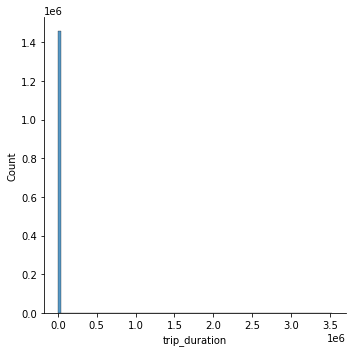

In [ ]:
sns.displot(df.trip_duration, bins=100);

In [ ]:
df = df.assign(log_trip_duration=np.log(df.trip_duration + 1))

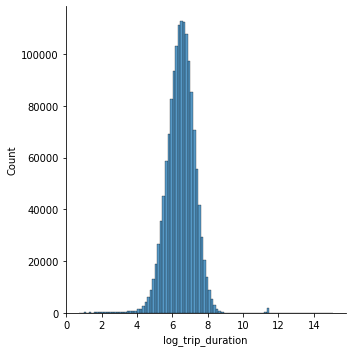

In [ ]:
sns.displot(df.log_trip_duration, bins=100);

In [ ]:
df.head(2)

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,distance_geo,pickup_month,pickup_day,pickup_dayofweek,pickup_hour,pickup_minute,pickup_weekends,log_trip_duration,trip_duration_hour
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,0,455,1.498570,3,14,0,17,24,0,6.122493,0.126389
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,0,663,1.805567,6,12,6,0,43,1,6.498282,0.184167


In [ ]:
df['trip_duration_hour'] = df['trip_duration'] / 3600

df['speed_km_h'] = df['distance_geo'] / df['trip_duration_hour']

In [ ]:
df['speed_km_h'].describe()

count    1.458612e+06
mean     1.440683e+01
std      1.244372e+01
min      0.000000e+00
25%      9.121690e+00
50%      1.279241e+01
75%      1.784527e+01
max      9.275142e+03
Name: speed_km_h, dtype: float64

In [ ]:
df['passenger_count'].unique()

array([1, 6, 4, 2, 3, 5, 0, 7, 9, 8])

#Обработка выбросов

In [ ]:
df = df[~df.passenger_count.isin([0, 7, 8, 9])]
df = df[df.speed_km_h.between(0.1, 220)]

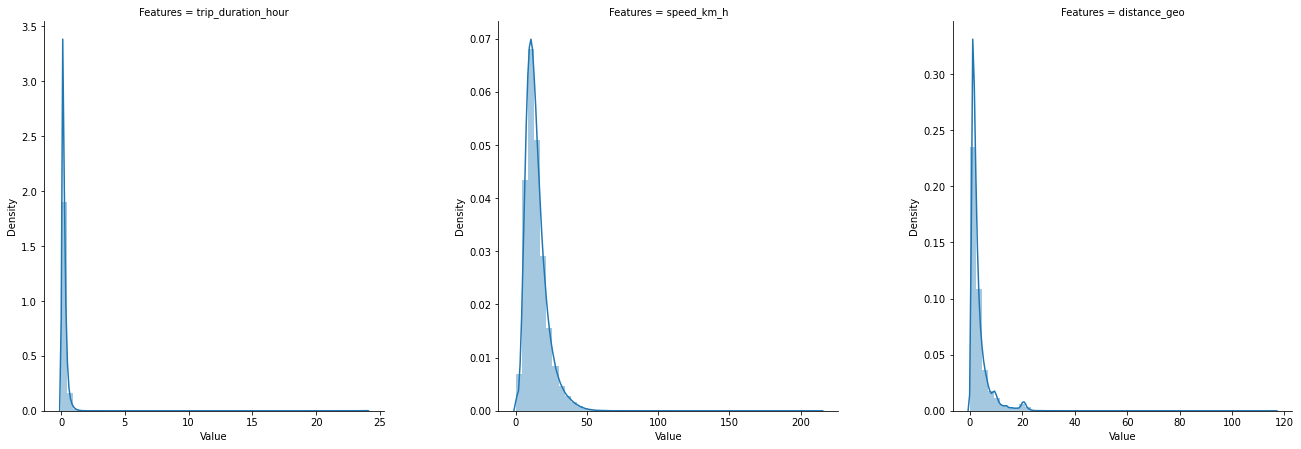

In [ ]:
num_cols = ['trip_duration_hour', 'speed_km_h', 'distance_geo']

numeric_features = df[num_cols]

numeric_features = numeric_features.stack().reset_index().rename(
    columns={"level_1": "Features", 0: "Value"})

ax = sns.FacetGrid(data=numeric_features, col="Features",
                   col_wrap=3, sharex=False, sharey=False)
ax = ax.map(sns.distplot, "Value")

plt.subplots_adjust(top=2, right=2)

In [ ]:
for i in num_cols:
    df['log_'+i] = np.log(df[i]+1)

In [ ]:
num_cols = ['log_trip_duration_hour', 'log_speed_km_h', 'log_distance_geo']

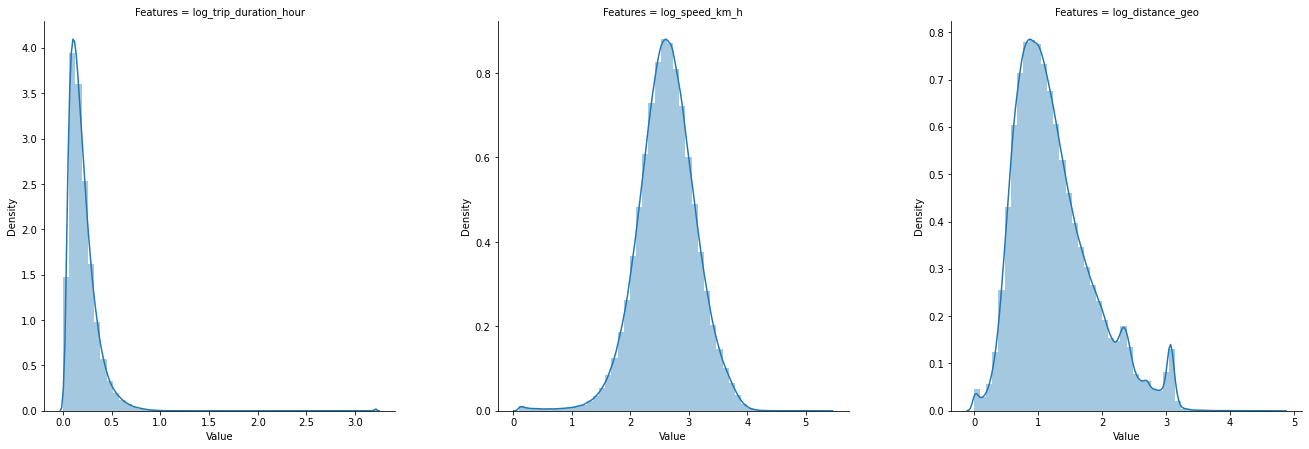

In [ ]:
numeric_features = df[num_cols]

numeric_features = numeric_features.stack().reset_index().rename(columns={
    "level_1": "Features",
    0: "Value"
})

ax = sns.FacetGrid(data=numeric_features,
                   col="Features",
                   col_wrap=3,
                   sharex=False,
                   sharey=False)
ax = ax.map(sns.distplot, "Value")

plt.subplots_adjust(top=2, right=2)

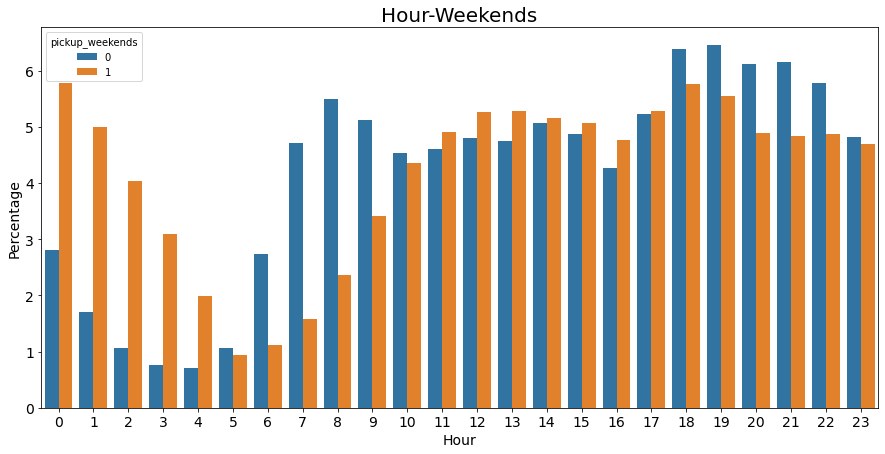

In [ ]:
norm_hours = (df.groupby(['pickup_weekends'])['pickup_hour']
              .value_counts(normalize=True)
              .rename('percentage')
              .mul(100)
              .reset_index()
              .sort_values('pickup_hour'))

plt.figure(figsize=(15, 7))
ax = sns.barplot(x="pickup_hour", y="percentage", hue="pickup_weekends", data=norm_hours)

plt.title('Hour-Weekends', fontsize=20)
plt.ylabel('Percentage', fontsize=14)
plt.xlabel('Hour', fontsize=14)

plt.xticks(fontsize=14)
plt.yticks(fontsize=14);

#Modeling

In [ ]:
!pip install lightautoml

     |████████████████████████████████| 294 kB 5.3 MB/s 
     |████████████████████████████████| 1.2 MB 35.9 MB/s 
     |████████████████████████████████| 804.1 MB 2.8 kB/s 
     |████████████████████████████████| 425 kB 46.3 MB/s 
     |████████████████████████████████| 76.1 MB 1.4 MB/s 
     |████████████████████████████████| 212 kB 49.1 MB/s 
     |████████████████████████████████| 2.8 MB 37.6 MB/s 
     |████████████████████████████████| 21.0 MB 1.4 MB/s 
     |████████████████████████████████| 23.2 MB 1.7 MB/s 
     |████████████████████████████████| 23.3 MB 41.7 MB/s 
     |████████████████████████████████| 23.3 MB 11.0 MB/s 
     |████████████████████████████████| 22.1 MB 57.5 MB/s 
     |████████████████████████████████| 22.1 MB 37.6 MB/s 
     |████████████████████████████████| 17.4 MB 1.5 MB/s 
  Created wheel for json2html: filename=json2html-1.3.0-py3-none-any.whl size=7609 sha256=4444aeeb07d41897fefc4669d1cb3c1c69f4071e58465dc488c7a87a237a9052
  Stored in directory: /root/

In [ ]:
RANDOM_STATE = 42
TEST_SIZE = 0.25
N_THREADS = 4
N_FOLDS = 5
TIMEOUT = 300

In [ ]:
from sklearn.metrics import mean_squared_log_error, mean_absolute_error
from sklearn.model_selection import train_test_split, KFold

def rmsle(y_true: np.ndarray, y_pred: np.ndarray):
    """
    The Root Mean Squared Log Error (RMSLE) metric 
    Логаритмическая ошибка средней квадратичной ошибки
    """
    return np.sqrt(mean_squared_log_error(y_true, y_pred))

In [ ]:
from lightautoml.automl.presets.tabular_presets import TabularAutoML, TabularUtilizedAutoML
from lightautoml.tasks import Task
import torch 

torch.set_num_threads(N_THREADS)

In [ ]:
drop_cols_auto = [
    'id',
    'pickup_datetime',
    'dropoff_datetime',
    
    'pickup_longitude',
    'pickup_latitude',
    'dropoff_longitude',
    'dropoff_latitude',
    
    'distance_geo',
    
    'date',
    
    'log_total_distance',
    
    'trip_duration',
    'log_trip_duration_hour',
    
    'speed_km_h',
    'log_speed_km_h',
]

In [ ]:
tr_data, te_data = train_test_split(df,
                                    test_size=TEST_SIZE,
                                    random_state=RANDOM_STATE)
print('Data splitted. Parts sizes: tr_data = {}, te_data = {}'.format(
    tr_data.shape, te_data.shape))

Data splitted. Parts sizes: tr_data = (1087896, 24), te_data = (362633, 24)


In [ ]:
%%time

task = Task('reg', loss='rmsle', metric='rmsle')

CPU times: user 3.24 ms, sys: 0 ns, total: 3.24 ms
Wall time: 3.38 ms


In [ ]:
%%time

roles = {
    'target': 'log_trip_duration',
    'drop': drop_cols_auto,
}

CPU times: user 5 µs, sys: 0 ns, total: 5 µs
Wall time: 9.3 µs


In [ ]:
automl = TabularAutoML(task=task,
                       timeout=TIMEOUT,
                       cpu_limit=N_THREADS,
                       reader_params={
                           'n_jobs': N_THREADS,
                           'cv': N_FOLDS,
                           'random_state': RANDOM_STATE,
                           'verbose': 1
                       })

In [ ]:
%%time

#out-of-fold prediction
oof_pred = automl.fit_predict(tr_data, roles = roles, verbose=1)

[14:01:40] Stdout logging level is INFO.
[14:01:40] Copying TaskTimer may affect the parent PipelineTimer, so copy will create new unlimited TaskTimer
[14:01:40] Task: reg

[14:01:40] Start automl preset with listed constraints:
[14:01:40] - time: 300.00 seconds
[14:01:40] - CPU: 4 cores
[14:01:40] - memory: 16 GB

[14:01:40] Train data shape: (1087896, 24)

[14:01:51] Layer 1 train process start. Time left 289.55 secs
[14:01:52] Start fitting Lvl_0_Pipe_0_Mod_0_LinearL2 ...
[14:01:59] Fitting Lvl_0_Pipe_0_Mod_0_LinearL2 finished. score = -0.07086771570845758
[14:01:59] Lvl_0_Pipe_0_Mod_0_LinearL2 fitting and predicting completed
[14:02:00] Time left 280.90 secs

[14:02:47] Selector_LightGBM fitting and predicting completed
[14:02:47] Start fitting Lvl_0_Pipe_1_Mod_0_LightGBM ...
[14:03:26] Time limit exceeded after calculating fold 0

[14:03:26] Fitting Lvl_0_Pipe_1_Mod_0_LightGBM finished. score = -0.06103672105937221
[14:03:26] Lvl_0_Pipe_1_Mod_0_LightGBM fitting and predicting comp

Metric MSLE is not implemented on GPU. Will use CPU for metric computation, this could significantly affect learning time


[14:04:40] Time limit exceeded after calculating fold 0

[14:04:40] Fitting Lvl_0_Pipe_1_Mod_2_CatBoost finished. score = -0.06306145030532807
[14:04:40] Lvl_0_Pipe_1_Mod_2_CatBoost fitting and predicting completed
[14:04:40] Time left 120.83 secs

[14:04:40] Time limit exceeded in one of the tasks. AutoML will blend level 1 models.

[14:04:40] Layer 1 training completed.

[14:04:40] Blending: optimization starts with equal weights and score -0.06929598173591234
[14:04:42] Blending: iteration 0: score = -0.06100682710825391, weights = [0.        0.8994066 0.1005934]
[14:04:43] Blending: iteration 1: score = -0.06100682710825391, weights = [0.        0.8994066 0.1005934]
[14:04:43] Blending: no score update. Terminated

[14:04:43] Automl preset training completed in 182.76 seconds

[14:04:43] Model description:
Final prediction for new objects (level 0) = 
	 0.89941 * (1 averaged models Lvl_0_Pipe_1_Mod_0_LightGBM) +
	 0.10059 * (1 averaged models Lvl_0_Pipe_1_Mod_2_CatBoost) 

CPU time

In [ ]:
print(automl.create_model_str_desc())

Final prediction for new objects (level 0) = 
	 0.89941 * (1 averaged models Lvl_0_Pipe_1_Mod_0_LightGBM) +
	 0.10059 * (1 averaged models Lvl_0_Pipe_1_Mod_2_CatBoost) 


In [ ]:
oof_pred_exp = np.exp(oof_pred.data[:, 0]) - 1

test_pred = automl.predict(te_data)
test_pred_exp = np.exp(test_pred.data[:, 0]) - 1

In [ ]:
#print(f"OOF score: {rmsle(tr_data['trip_duration'], oof_pred_exp)}")
print(f"HOLDOUT score: {rmsle(te_data['trip_duration'].values, test_pred_exp)}")

HOLDOUT score: 0.42082014303914594


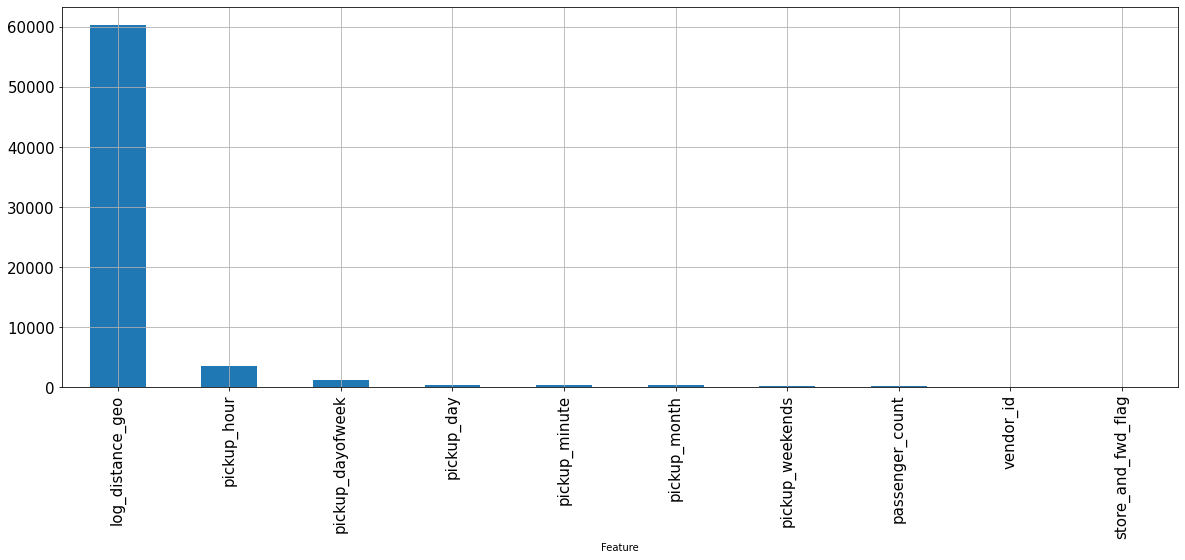

In [ ]:
fast_fi = automl.get_feature_scores('fast')
fast_fi[:10].set_index('Feature')['Importance'].plot.bar(figsize = (20, 7), grid = True)

plt.xticks(fontsize=15)
plt.yticks(fontsize=15);
plt.show()